In [1]:
import random
import matplotlib.pyplot as plt

vertices =  [[0.9172701705954721, 0.22640967387765354], [0.8805815816563313, 0.015853210662760353], [0.254309609514477, 0.49692111250906434], [0.5616934318332278, 0.16140159901560347], [0.8046558658015565, 0.07225053872846099], [0.5095073723768635, 0.5926520500313199], [0.3255919840106628, 0.5767866350571912], [0.23499307454496754, 0.11171609387370529], [0.43680217782591346, 0.9083408424226356], [0.5525270967975157, 0.857068524588644]]


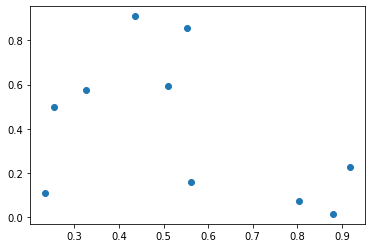

In [2]:
# create and plot the points in the [0,1] x [0,1] plane
n_points = 10
vertices = []
for i in range(n_points):
    point = [0,0]
    point[0] = random.random()
    point[1] = random.random()
    vertices.append(point)
print("vertices = ",vertices)
plt.scatter(*zip(*vertices))

In [3]:
# function for the evaluation of the distance between two points
def distance(self, other):
        return (self[0] - other[0])**2 + (self[1] - other[1])**2

In [4]:
# Prim's algorithm
remaining_points = vertices.copy()                        # list of points not yet in the mst (all points at this stage)
mst = []                                                  # list of the points in the mst (empty list at this stage)
connections = []                                          # list of containing pairs of connected points and ther respective distance
source = random.choice(remaining_points)                  # at start a random point is selected
remaining_points.remove(source)                           # the first point is removed from remaining_points
mst.append(source)                                        # the first point is inserted into mst

while remaining_points:                                   
    outer_min = 2                                         # at each iteration,for each point in mst, the distance between itself and 
    for selected in mst:                                  # every point in remaining_points is calculated, then the point in 
        min = 2                                           # remaining_points closest to it is saved as the best next point to include;
        for possible in remaining_points:                 # we then compare the closest point found of each point in mst and the final
            d = distance(selected, possible)              # point chosen will be the one which distance from its corresponding point
            if d < min:                                   # in mst is the lowest
                min = d
                new_point = possible
        if min < outer_min:
            outer_min = min
            final_b = new_point
            final_a = selected
    mst.append(final_b)                                   # the final next point is added to mst
    
    connections.append([final_a, final_b, outer_min])     # the final next point, its correspondent previous one and their distance are saved 
                                                          # in connections
    
    remaining_points.remove(final_b)                      # the final next point is removed from remaining_points

    # the process is repeated until there are not anymore elements in remaining_points

In [5]:
# print the three lists just to make sure everithing worked fine (mst and vertices should have the same elements)
print("mst = ",mst)
print("\n")
print("vertices = ",vertices)
print("\n")
print("connections = ",connections)

mst =  [[0.8805815816563313, 0.015853210662760353], [0.8046558658015565, 0.07225053872846099], [0.9172701705954721, 0.22640967387765354], [0.5616934318332278, 0.16140159901560347], [0.23499307454496754, 0.11171609387370529], [0.254309609514477, 0.49692111250906434], [0.3255919840106628, 0.5767866350571912], [0.5095073723768635, 0.5926520500313199], [0.5525270967975157, 0.857068524588644], [0.43680217782591346, 0.9083408424226356]]


vertices =  [[0.9172701705954721, 0.22640967387765354], [0.8805815816563313, 0.015853210662760353], [0.254309609514477, 0.49692111250906434], [0.5616934318332278, 0.16140159901560347], [0.8046558658015565, 0.07225053872846099], [0.5095073723768635, 0.5926520500313199], [0.3255919840106628, 0.5767866350571912], [0.23499307454496754, 0.11171609387370529], [0.43680217782591346, 0.9083408424226356], [0.5525270967975157, 0.857068524588644]]


connections =  [[[0.8805815816563313, 0.015853210662760353], [0.8046558658015565, 0.07225053872846099], 0.008945372941010

In [6]:
# still temporary cell; connections is split in list of pairs of points (nodes to be connected) and list of corresponding weights
temp = []
for i in connections:
    temp.append([i[0],i[1]])
distances = []
print("pairs of connected nodes = ",temp)
print("\n")
for i in temp:
    distances.append(distance(i[0],i[1]))
print("distances = ",distances)

pairs of connected nodes =  [[[0.8805815816563313, 0.015853210662760353], [0.8046558658015565, 0.07225053872846099]], [[0.8046558658015565, 0.07225053872846099], [0.9172701705954721, 0.22640967387765354]], [[0.8046558658015565, 0.07225053872846099], [0.5616934318332278, 0.16140159901560347]], [[0.5616934318332278, 0.16140159901560347], [0.23499307454496754, 0.11171609387370529]], [[0.23499307454496754, 0.11171609387370529], [0.254309609514477, 0.49692111250906434]], [[0.254309609514477, 0.49692111250906434], [0.3255919840106628, 0.5767866350571912]], [[0.3255919840106628, 0.5767866350571912], [0.5095073723768635, 0.5926520500313199]], [[0.5095073723768635, 0.5926520500313199], [0.5525270967975157, 0.857068524588644]], [[0.5525270967975157, 0.857068524588644], [0.43680217782591346, 0.9083408424226356]]]


distances =  [0.008945372941010268, 0.036447020594163944, 0.06697865587013616, 0.10920177287348252, 0.14875603490509562, 0.011459678605699837, 0.03407658147019174, 0.07176676870655287,

<function matplotlib.pyplot.show(close=None, block=None)>

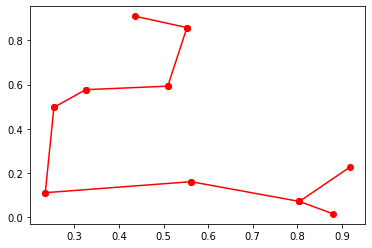

In [7]:
# the pairs of connected points are plotted with their corresponding connection, the final mst is formed
for pair in temp:
    plt.plot(*zip(*pair), "ro-")
plt.show